<a href="https://colab.research.google.com/github/NidhiS9830/woc5.0-ml-weather-prediction-case-study-Nidhi_Somaiya/blob/main/WOC_checkpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np

1) Reading the above CSV file in google colab using the pandas’ library and converting it into data frames.


In [66]:
youtube_df=pd.read_csv('/content/Youtube Influencer Analysis - Updated.csv',encoding='mac_roman')

In [67]:
youtube_df.head()

,Video Link,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,...,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Community Engagement (Posts per week),Intern Who Collected the Data
0,https://www.youtube.com/watch?v=_0fUOJ55gis,"146,059",Samse - Didupe Off-road Royal Enfield Himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,"1,841.00",...,Yes,0,419,8/6/2022,1080,462,12.0,No,1,Akhil Teja
1,https://www.youtube.com/watch?v=_70MSLPRfZI,"231,969",Bhoom Baddhal Web Series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864.00,...,Yes,1,189,6/15/2022,1080,251,12.0,Yes,2,Akhil Teja
2,https://www.youtube.com/watch?v=_8gfCdt3H00&t=87s,878,"Customer Psychology, Four Views Of Consumer De...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,0:08:12,492.00,...,Yes,0,0,NaN,720,158,0.0,No,0,Syed safdar
3,https://www.youtube.com/watch?v=_CkFNJgKsFs,"9,965",Top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,NaN,1680000,541653219,0:01:06,66.00,...,Yes,0,77,9/22/2022,1080,46509,48.0,No,20,Syed safdar
4,https://www.youtube.com/watch?v=_GFkHA5EZdE,"39,780,561",73 Questions With Selena Gomez,Vogue - YouTube,Vogue,NaN,12100000,3600496171,0:07:40,460.00,...,Yes,0,28221,9/23/2022,1080,2872,113.0,No,1,Rahul Singh


In [68]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Video Link                             905 non-null    object 
 1   Video Views                            905 non-null    object 
 2   Video Title                            905 non-null    object 
 3   Channel URL                            905 non-null    object 
 4   Creator Name                           894 non-null    object 
 5   Creator Gender                         591 non-null    object 
 6   Total Channel Subcribers               905 non-null    object 
 7   Total Chanel Views                     905 non-null    object 
 8   Duration of Video                      905 non-null    object 
 9   Duration in Seconds                    905 non-null    object 
 10  Date of Video Upload                   905 non-null    object 
 11  No of 

2) How many values are missing for each column and try dropping or replacing NULL values using appropriate pandas’ function.

In [69]:
youtube_df.isna().sum()

Video Link                                 0
Video Views                                0
Video Title                                0
Channel URL                                0
Creator Name                              11
Creator Gender                           314
Total Channel Subcribers                   0
Total Chanel Views                         0
Duration of Video                          0
Duration in Seconds                        0
Date of Video Upload                       0
No of Likes                                1
Language of the Video                     21
Subtitle                                   1
Video Description                          0
Hashtags                                   0
No of Comments                             0
Date of the Last Comment                  24
Maximum Quality of the Video               0
No of Videos the Channel                   0
No of Playlist                             9
Premiered or Not                           0
Community 

In [70]:
#As the number of null values for these columns is only 1 . We can drop it.
youtube_df=youtube_df.dropna(subset=["Subtitle","No of Likes","No of Playlist"])

In [71]:
youtube_df.columns

Index(['Video Link', 'Video Views', 'Video Title', 'Channel URL',
       'Creator Name', 'Creator Gender', 'Total Channel Subcribers',
       'Total Chanel Views', 'Duration of Video', 'Duration in Seconds',
       'Date of Video Upload', 'No of Likes', 'Language of the Video',
       'Subtitle', 'Video Description', 'Hashtags', 'No of Comments',
       'Date of the Last Comment', 'Maximum Quality of the Video',
       'No of Videos the Channel', 'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)',
       'Intern Who Collected the Data'],
      dtype='object')

In [72]:
#As the number of null values for  Creator Gender is 309. We cannot simply replace
#it with mode value . As the data will be highly skewed
youtube_df['Creator Gender'].value_counts(dropna=False)

Male       490
NaN        309
Female      76
Company     19
Name: Creator Gender, dtype: int64

In [73]:
#So I took a random sample od creator gender and found the corresponding creator name
#Since all the random corresponding creator name is related to some Industry or Company
 
df = youtube_df[youtube_df['Creator Gender'].isna()].sample(n=10)

In [74]:
df['Creator Name']

397          DW Documentary
514              Epicurious
167                BBC News
515                Moto Zip
82         Business Insider
164                 Edureka
292           Scenic Scenes
543              AshStudio7
831           your story tv
899    Sahil Online TV News
Name: Creator Name, dtype: object

In [75]:
#Hence all the null values are replaced with Company
youtube_df['Creator Gender'].fillna("Company",inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [76]:
youtube_df['Creator Gender'].isna().sum()

0

                                       No of Likes  Hashtags  \
No of Likes                               1.000000 -0.034399   
Hashtags                                 -0.034399  1.000000   
Maximum Quality of the Video             -0.027247 -0.012994   
No of Videos the Channel                 -0.020559 -0.000543   
No of Playlist                            0.006936 -0.044001   
Community Engagement (Posts per week)    -0.022451  0.117605   

                                       Maximum Quality of the Video  \
No of Likes                                               -0.027247   
Hashtags                                                  -0.012994   
Maximum Quality of the Video                               1.000000   
No of Videos the Channel                                  -0.038622   
No of Playlist                                            -0.023011   
Community Engagement (Posts per week)                     -0.068016   

                                       No of Videos t

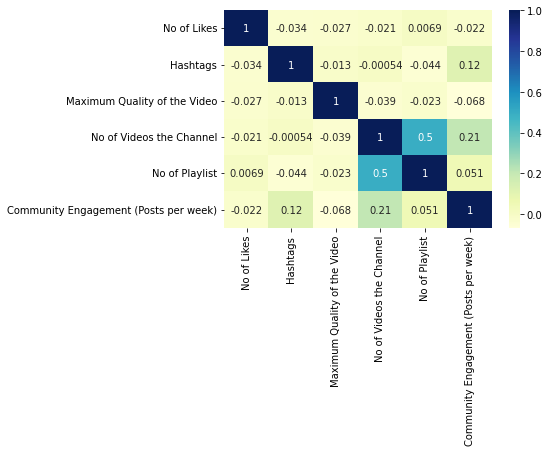

In [77]:
import matplotlib.pyplot as mp
import seaborn as sb


print(youtube_df.corr())

dataplot = sb.heatmap(youtube_df.corr(), cmap="YlGnBu", annot=True)

mp.show()


In [78]:
#s there are only 21 null values and there is no direct correlation with other 
#variables. 
youtube_df['Language of the Video'].unique()

array(['Kannada', 'Telugu', 'Hindi', 'English', 'Japenese', 'Tamil', nan,
       'Urdu', 'Punjabi', 'Malayalam', 'Mongalian', 'Russian', 'Italian',
       'Hindi/English', 'Sanskrit', 'English + Hindi', 'Konkani',
       'Arabic', 'Urdu + Arabic', 'Nawayathi'], dtype=object)

In [79]:
youtube_df.dropna(subset=['Language of the Video'],inplace=True)

In [80]:
#for Last Date of comment
#As there is no duplicate value of the video Link and hence we cannot find the
#corresponding last date of comment for the null of same video link.
youtube_df['Video Link'].duplicated().sum()

0

In [81]:
#Drop
youtube_df.dropna(subset=['Date of the Last Comment'],inplace=True)

In [82]:
youtube_df.isna().sum()

Video Link                                0
Video Views                               0
Video Title                               0
Channel URL                               0
Creator Name                             11
Creator Gender                            0
Total Channel Subcribers                  0
Total Chanel Views                        0
Duration of Video                         0
Duration in Seconds                       0
Date of Video Upload                      0
No of Likes                               0
Language of the Video                     0
Subtitle                                  0
Video Description                         0
Hashtags                                  0
No of Comments                            0
Date of the Last Comment                  0
Maximum Quality of the Video              0
No of Videos the Channel                  0
No of Playlist                            0
Premiered or Not                          0
Community Engagement (Posts per 

3) Drop the columns which are irrelevant features to feed into our model.

In [83]:
#all Tthe below columns are irrelavent . Hence are dropped
youtube_df.drop(['Video Link','Channel URL','Creator Name','Intern Who Collected the Data'],inplace=True,axis=1)

In [84]:
youtube_df.columns

Index(['Video Views', 'Video Title', 'Creator Gender',
       'Total Channel Subcribers', 'Total Chanel Views', 'Duration of Video',
       'Duration in Seconds', 'Date of Video Upload', 'No of Likes',
       'Language of the Video', 'Subtitle', 'Video Description', 'Hashtags',
       'No of Comments', 'Date of the Last Comment',
       'Maximum Quality of the Video', 'No of Videos the Channel',
       'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)'],
      dtype='object')

4) Some columns are not statistical data but in the form of strings. It Is difficult for our model to learn when the data is in form of strings. Your task is to encode these strings using proper encoding techniques.

In [85]:
#captilizing all the string values of the columns  #
youtube_df['Subtitle'] = youtube_df['Subtitle'].str.upper()
youtube_df['Video Description']=youtube_df['Video Description'].str.upper()
youtube_df['Language of the Video']=youtube_df['Language of the Video'].str.upper()
youtube_df['Premiered or Not']=youtube_df['Premiered or Not'].str.upper()



In [86]:
youtube_df

,Video Views,Video Title,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,No of Likes,Language of the Video,Subtitle,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Community Engagement (Posts per week)
0,"146,059",Samse - Didupe Off-road Royal Enfield Himalayan,Male,40200,7964284,00:30:41,"1,841.00",7/29/2022,6700.0,KANNADA,NO,YES,0,419,8/6/2022,1080,462,12.0,NO,1
1,"231,969",Bhoom Baddhal Web Series,Male,920000,137535681,00:14:24,864.00,5/22/2022,7800.0,TELUGU,NO,YES,1,189,6/15/2022,1080,251,12.0,YES,2
3,"9,965",Top countries with proven natural gas reserves,Company,1680000,541653219,0:01:06,66.00,9/13/2022,188.0,ENGLISH,NO,YES,0,77,9/22/2022,1080,46509,48.0,NO,20
4,"39,780,561",73 Questions With Selena Gomez,Company,12100000,3600496171,0:07:40,460.00,3/21/2017,901000.0,ENGLISH,YES,YES,0,28221,9/23/2022,1080,2872,113.0,NO,1
5,"257,334",HERO - Baananchige Oduva Baara,Male,382000,154898226,00:06:01,361.00,3/24/2021,8300.0,KANNADA,NO,YES,1,387,4/24/2021,2160,94,14.0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,"6,892",Calming mashup of Islamic Nasheed 2022 | Isami...,Company,594000,129926690,00:13:47,827.00,9/29/2022,235.0,URDU + ARABIC,NO,YES,0,15,10/4/2022,1080,5024,36.0,NO,1
901,"16,554",Amchi Nawayat Mehfil hee,Company,594000,129926690,00:06:44,404.00,8/6/2017,117.0,NAWAYATHI,NO,YES,2,0,10/4/2022,720,5024,36.0,NO,1
902,"32,798",Aas ge Kaagaz,Company,23500,5104872,00:06:24,384.00,1/3/2021,1.0,NAWAYATHI,NO,YES,3,0,8/4/2022,720,1018,13.0,NO,1
903,"1,503",Anjuman Tarana by ABHS Students | Anjuman Anju...,Company,23500,5104872,00:04:39,279.00,3/6/2022,1.0,URDU,NO,YES,3,0,8/4/2022,1080,1018,13.0,NO,1


In [87]:
youtube_df['Subtitle'] =youtube_df['Subtitle'].map({'YES': 1, 'NO': 0})
youtube_df['Video Description'] =youtube_df['Video Description'].map({'YES': 1, 'NO': 0})
youtube_df['Premiered or Not'] =youtube_df['Premiered or Not'].map({'YES': 1, 'NO': 0})

In [88]:
youtube_df.head()

,Video Views,Video Title,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,No of Likes,Language of the Video,Subtitle,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Community Engagement (Posts per week)
0,"146,059",Samse - Didupe Off-road Royal Enfield Himalayan,Male,40200,7964284,00:30:41,"1,841.00",7/29/2022,6700.0,KANNADA,0,1,0,419,8/6/2022,1080,462,12.0,0,1
1,"231,969",Bhoom Baddhal Web Series,Male,920000,137535681,00:14:24,864.00,5/22/2022,7800.0,TELUGU,0,1,1,189,6/15/2022,1080,251,12.0,1,2
3,"9,965",Top countries with proven natural gas reserves,Company,1680000,541653219,0:01:06,66.00,9/13/2022,188.0,ENGLISH,0,1,0,77,9/22/2022,1080,46509,48.0,0,20
4,"39,780,561",73 Questions With Selena Gomez,Company,12100000,3600496171,0:07:40,460.00,3/21/2017,901000.0,ENGLISH,1,1,0,28221,9/23/2022,1080,2872,113.0,0,1
5,"257,334",HERO - Baananchige Oduva Baara,Male,382000,154898226,00:06:01,361.00,3/24/2021,8300.0,KANNADA,0,1,1,387,4/24/2021,2160,94,14.0,0,0
